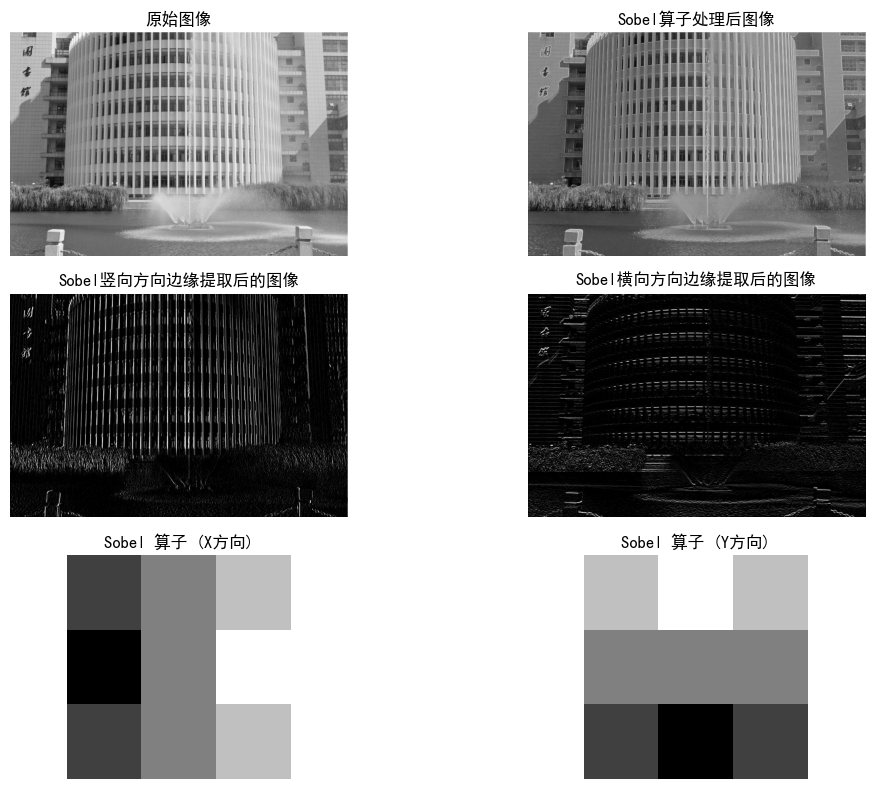

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
I1 = cv2.imread("D:/picture/school.png")
I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)  # 将彩色图转换为灰度图

# Sobel 算子（X方向竖向锐化模板）
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Sobel 算子（Y方向横向锐化模板）
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# 获取图像尺寸
m, n = I1_gray.shape
I2_x = np.zeros_like(I1_gray, dtype=np.float64)  # X方向梯度
I2_y = np.zeros_like(I1_gray, dtype=np.float64)  # Y方向梯度
I2_combined = np.zeros_like(I1_gray, dtype=np.float64)  # 组合后的梯度

# 计算 X 方向 Sobel 梯度
for i in range(1, m-1):
    for j in range(1, n-1):
        I2_x[i, j] = (sobel_x[0, 0] * I1_gray[i-1, j-1] + sobel_x[0, 1] * I1_gray[i-1, j] + sobel_x[0, 2] * I1_gray[i-1, j+1] +
                      sobel_x[1, 0] * I1_gray[i, j-1] + sobel_x[1, 1] * I1_gray[i, j] + sobel_x[1, 2] * I1_gray[i, j+1] +
                      sobel_x[2, 0] * I1_gray[i+1, j-1] + sobel_x[2, 1] * I1_gray[i+1, j] + sobel_x[2, 2] * I1_gray[i+1, j+1])

# 计算 Y 方向 Sobel 梯度
for i in range(1, m-1):
    for j in range(1, n-1):
        I2_y[i, j] = (sobel_y[0, 0] * I1_gray[i-1, j-1] + sobel_y[0, 1] * I1_gray[i-1, j] + sobel_y[0, 2] * I1_gray[i-1, j+1] +
                      sobel_y[1, 0] * I1_gray[i, j-1] + sobel_y[1, 1] * I1_gray[i, j] + sobel_y[1, 2] * I1_gray[i, j+1] +
                      sobel_y[2, 0] * I1_gray[i+1, j-1] + sobel_y[2, 1] * I1_gray[i+1, j] + sobel_y[2, 2] * I1_gray[i+1, j+1])

# 组合 X 和 Y 方向的梯度 (梯度模)
I2_combined = np.sqrt(I2_x**2 + I2_y**2)

# 将结果限制在 [0, 255] 范围，并转换为8位图像
I2_combined = np.clip(I2_combined, 0, 255).astype(np.uint8)

# 叠加原灰度图和边缘检测结果
sharpened_image = cv2.addWeighted(I1_gray, 0.7, I2_combined, 0.3, 0)

# 设置图像显示窗口
plt.figure(figsize=(12, 8))

# 显示原图
plt.subplot(3, 2, 1)
plt.imshow(I1_gray, cmap='gray')
plt.title('原始图像')
plt.axis('off')

# 显示叠加后的锐化图像
plt.subplot(3, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sobel算子处理后图像')
plt.axis('off')
# 显示 X 方向梯度图像
plt.subplot(3, 2, 3)
plt.imshow(np.clip(I2_x, 0, 255).astype(np.uint8), cmap='gray')
plt.title('Sobel竖向方向边缘提取后的图像')
plt.axis('off')

# 显示 Y 方向梯度图像
plt.subplot(3, 2, 4)
plt.imshow(np.clip(I2_y, 0, 255).astype(np.uint8), cmap='gray')
plt.title('Sobel横向方向边缘提取后的图像')
plt.axis('off')



# 显示 Sobel 算子模板 X
plt.subplot(3, 2, 5)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel 算子 (X方向)')
plt.axis('off')

# 显示 Sobel 算子模板 Y
plt.subplot(3, 2, 6)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel 算子 (Y方向)')
plt.axis('off')

#plt.tight_layout()
plt.show()


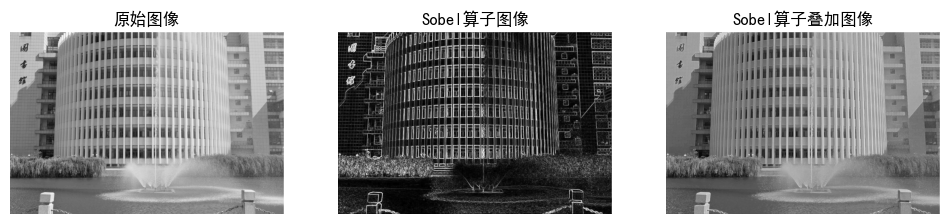

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
I1 = cv2.imread("D:/picture/school.png")
I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)  # 将彩色图转换为灰度图

# Sobel 算子（X方向竖向锐化模板）
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Sobel 算子（Y方向横向锐化模板）
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# 获取图像尺寸
m, n = I1_gray.shape
I2_x = np.zeros_like(I1_gray, dtype=np.float64)  # X方向梯度
I2_y = np.zeros_like(I1_gray, dtype=np.float64)  # Y方向梯度

# 计算 X 方向 Sobel 梯度
for i in range(1, m-1):
    for j in range(1, n-1):
        I2_x[i, j] = (sobel_x[0, 0] * I1_gray[i-1, j-1] + sobel_x[0, 1] * I1_gray[i-1, j] + sobel_x[0, 2] * I1_gray[i-1, j+1] +
                      sobel_x[1, 0] * I1_gray[i, j-1] + sobel_x[1, 1] * I1_gray[i, j] + sobel_x[1, 2] * I1_gray[i, j+1] +
                      sobel_x[2, 0] * I1_gray[i+1, j-1] + sobel_x[2, 1] * I1_gray[i+1, j] + sobel_x[2, 2] * I1_gray[i+1, j+1])

# 计算 Y 方向 Sobel 梯度
for i in range(1, m-1):
    for j in range(1, n-1):
        I2_y[i, j] = (sobel_y[0, 0] * I1_gray[i-1, j-1] + sobel_y[0, 1] * I1_gray[i-1, j] + sobel_y[0, 2] * I1_gray[i-1, j+1] +
                      sobel_y[1, 0] * I1_gray[i, j-1] + sobel_y[1, 1] * I1_gray[i, j] + sobel_y[1, 2] * I1_gray[i, j+1] +
                      sobel_y[2, 0] * I1_gray[i+1, j-1] + sobel_y[2, 1] * I1_gray[i+1, j] + sobel_y[2, 2] * I1_gray[i+1, j+1])

# 组合 X 和 Y 方向的梯度 (梯度模)
I2_combined = np.sqrt(I2_x**2 + I2_y**2)

# 将结果限制在 [0, 255] 范围，并转换为8位图像
I2_combined = np.clip(I2_combined, 0, 255).astype(np.uint8)


# 显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 设置图像显示窗口
plt.figure(figsize=(12, 8))
# 显示原图
plt.subplot(1, 3, 1)
plt.imshow(I1_gray, cmap='gray')
plt.title('原始图像')
plt.axis('off')



# 显示叠加后的锐化图像
sharpened_image = cv2.addWeighted(I1_gray, 0.8, I2_combined, 0.2, 0)


# 显示 X 和 Y 方向组合后的梯度图像
plt.subplot(1, 3, 2)
plt.imshow(I2_combined, cmap='gray')
plt.title('Sobel算子图像')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sobel算子叠加图像')
plt.axis('off')
plt.show()
